In [173]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix

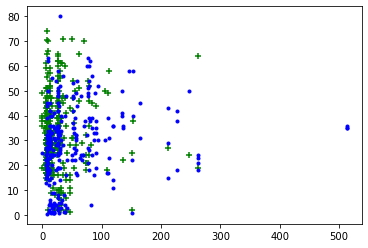

In [174]:
df = pd.read_csv("train.csv")
df_ = pd.read_csv("test.csv")
# df = df[df['Fare']<190]
df_dead = df[df.Survived==0]
df_survive = df[df.Survived==1]
plt.scatter(df_dead['Fare'], df_dead['Age'],color="green",marker='+')
plt.scatter(df_survive['Fare'], df_survive['Age'],color="blue",marker='.')
plt.show()
#Removing the columns that don't make much difference according to me on their ability to survive!
x = df.drop(['PassengerId','Name','Ticket','Cabin','Survived','Embarked'],axis='columns')
x_ = df_.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis='columns')
#x.head(20)

In [175]:
#Filling the missing age values with the mean of the age column!
t = int(x['Age'].mean())
f = int(x['Fare'].mean())
print(t)
x["Age"] = x["Age"].fillna(t)
print(x.shape)
x_["Age"] = x_["Age"].fillna(t)
x_["Fare"] = x_["Fare"].fillna(f)
print(x_.shape)
x.head(10)

29
(891, 6)
(418, 6)


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
5,3,male,29.0,0,0,8.4583
6,1,male,54.0,0,0,51.8625
7,3,male,2.0,3,1,21.0750
8,3,female,27.0,0,2,11.1333
9,2,female,14.0,1,0,30.0708


In [176]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.560236,0.523008,0.381594,32.204208
std,0.836071,13.005010,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [177]:
y = df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [178]:
#x.iloc[[x['Sex']=="male"],['Sex']]=1
# gender = {'male': 1,'female': 2}
x.Sex[x.Sex=="male"] = 1
x.Sex[x.Sex=="female"] = 2
x_.Sex[x_.Sex=="male"] = 1
x_.Sex[x_.Sex=="female"] = 2
x.head()

<ipython-input-178-af3f06fc79cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Sex[x.Sex=="male"] = 1
<ipython-input-178-af3f06fc79cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Sex[x.Sex=="female"] = 2
<ipython-input-178-af3f06fc79cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_.Sex[x_.Sex=="male"] = 1
<ipython-input-178-af3f06fc79cc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,2,38.0,1,0,71.2833
2,3,2,26.0,0,0,7.9250
3,1,2,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [179]:
#plt.scatter(x['Fare'],x['Age'])
#plt.show()
#dropping these values accuracy increased from 76% to 81%
# x = x.drop(['SibSp','Parch'],axis='columns')
# x_ = x_.drop(['SibSp','Parch'],axis='columns')

# Logisitic Regression classification implementation:

In [180]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [181]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
199,2,2,24.0,0,0,13.0000
196,3,1,29.0,0,0,7.7500
448,3,2,5.0,2,1,19.2583
29,3,1,29.0,0,0,7.8958
128,3,2,29.0,1,1,22.3583


In [182]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [183]:
y_pred=model.predict(X_test)
print(y_pred)
#model.predict_proba(X_test)

[1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0
 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 1 0 1 1 1 0 0 1 0]


# Required prediction on data from Test.csv :

In [184]:
y_predicted_test=model.predict(x_)
print(y_predicted_test)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [185]:
print(model.coef_)
print(model.intercept_)

[[-1.01773416e+00  2.57787187e+00 -3.83686738e-02 -2.60874545e-01
  -1.19772023e-01  2.09043382e-03]]
[-0.53721469]


In [186]:
print(metrics.accuracy_score(y_test,y_pred))
# print(score)

0.8022388059701493


In [187]:
cm=np.array(confusion_matrix(y_test,y_pred))
print(cm)

[[145  20]
 [ 33  70]]


# Support Vector Machine Classification implementation:

In [188]:
clf=SVC()
#Training of the model 
clf.fit(X_train,y_train)
#Testing of our trained model 
pred=clf.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [189]:
print(metrics.accuracy_score(y_test,pred))
#Importing confusion matrix
confusionm=np.array(confusion_matrix(y_test,pred))
print(confusionm)

0.6791044776119403
[[157   8]
 [ 78  25]]


# Regression (C) in SVM

In [190]:
model_C = SVC(C=50)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.7947761194029851

# Naive Bayes Classification implementation:

In [191]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred_ = classifier.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_))

0.7910447761194029


In [192]:
confusionm=np.array(confusion_matrix(y_test,pred))
print(confusionm)

[[157   8]
 [ 78  25]]
